In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Splitting data into training and testing

In [3]:
fruits = pd.read_table('assets/fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# uppercase represents 2D of features
X = fruits[['mass', 'width', 'height', 'color_score']] 
# lowercase represents 1D of labels
y = fruits['fruit_label'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # random state is set as a 'seed'

### Visualizing Data Before ML

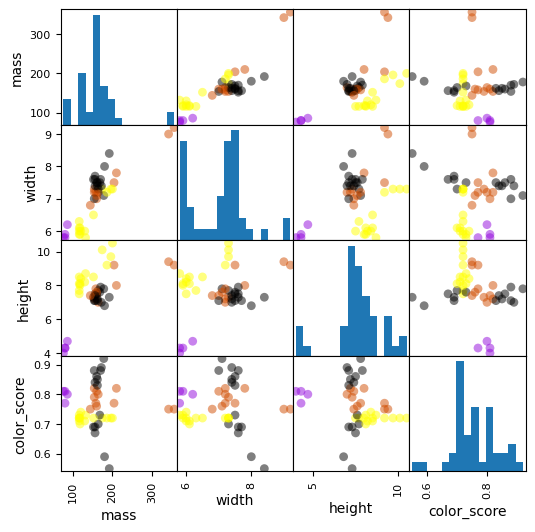

In [5]:
from matplotlib import cm

# color map
cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X_train, c = y_train, marker = 'o', s = 40, hist_kwds = {'bins':15},
                            figsize = (6,6),
                            cmap=cmap)

Text(0.5, 0, 'color score')

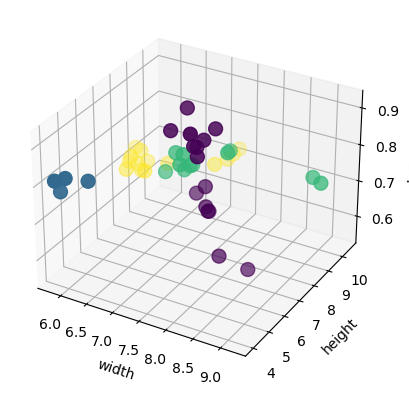

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection = '3d')

ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s = 100)

ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color score')

### Training a classifier via K-nearest neighbors

In [9]:
# k is the number of nearest neighbors via euclidean distance

# distance could be weighted (e.g., x = 1, y = 1, z = 2 gives color score five times weight)

lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [12]:
# training

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# computing accuracy on test data

knn.score(X_test, y_test)

0.5333333333333333

In [19]:
# predicting a fruit with mass 20, width 4.3, height 5.5, color score 0.5
prediction = knn.predict([[20, 4.3, 5.5, 0.5]])
lookup_fruit_name[prediction[0]]

'mandarin'

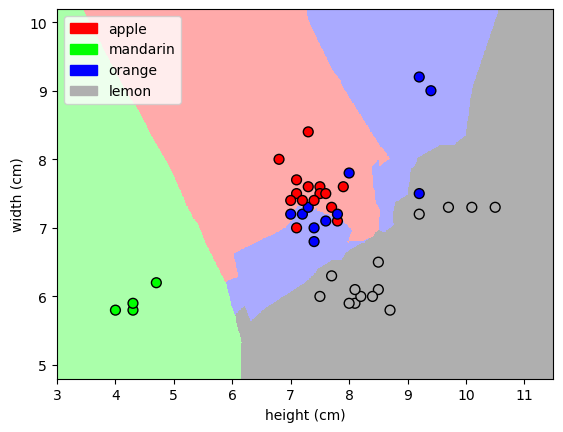

In [21]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')

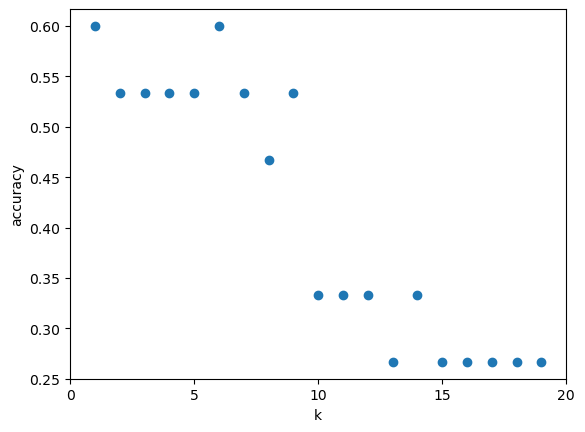

In [24]:
# plotting accuracy as function of k

k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.scatter(k_range, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks([0, 5, 10, 15, 20]);